In [10]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
from pathlib import Path

sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)


processed_dir = Path("../data/processed")
csv_path = processed_dir / "seagate_no_outliers.csv"

df = pd.read_csv(csv_path, parse_dates=["date"])
print("Data sample:")
display(df.head())


if "Return" not in df.columns:
    df["Return"] = df["price"].pct_change()
    df = df.dropna().reset_index(drop=True)

df.info()
print("\nMissing values per column:")
print(df.isna().sum())

Data sample:


,date,price,ticker,Return,outlier_iqr,outlier_z
0,2025-02-24,98.742737,STX,-0.007635,False,False
1,2025-02-25,98.387543,STX,-0.003597,False,False
2,2025-02-26,98.930191,STX,0.005515,False,False
3,2025-02-27,99.324852,STX,0.003989,False,False
4,2025-02-28,100.548286,STX,0.012318,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         114 non-null    datetime64[ns]
 1   price        114 non-null    float64       
 2   ticker       114 non-null    object        
 3   Return       114 non-null    float64       
 4   outlier_iqr  114 non-null    bool          
 5   outlier_z    114 non-null    bool          
dtypes: bool(2), datetime64[ns](1), float64(2), object(1)
memory usage: 3.9+ KB

Missing values per column:
date           0
price          0
ticker         0
Return         0
outlier_iqr    0
outlier_z      0
dtype: int64


In [11]:
# ===  Summary statistics ===
desc = df[["price","Return"]].describe().T
desc["skew"] = [skew(df[c].dropna()) for c in desc.index]
desc["kurtosis"] = [kurtosis(df[c].dropna()) for c in desc.index]

print("\nDescriptive statistics with skew/kurtosis:")
display(desc)



Descriptive statistics with skew/kurtosis:


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
price,114.0,116.371748,28.809981,66.188530,88.015121,117.018612,147.019997,158.699997,-0.029500,-1.484337
Return,114.0,0.004520,0.018298,-0.034451,-0.006974,0.003318,0.015980,0.047573,0.247347,-0.466157


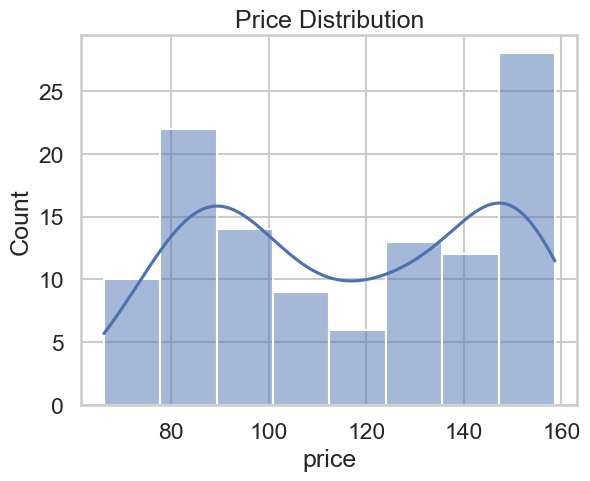

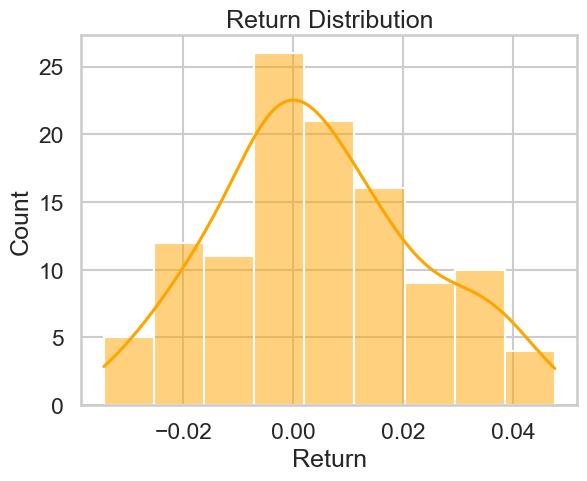

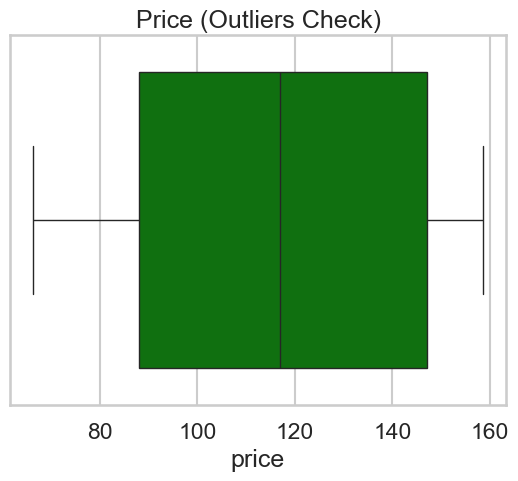

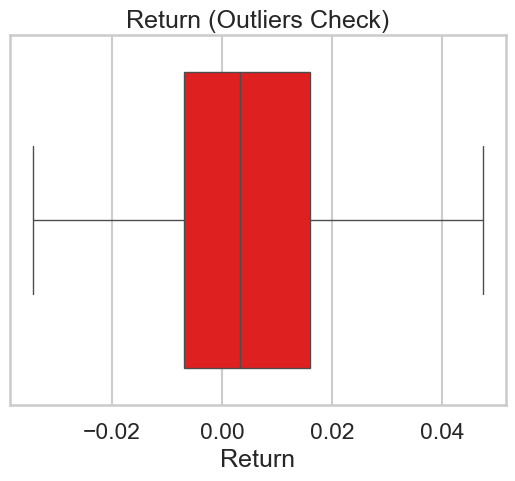

In [12]:
# ===  Distributions ===
# Histogram for price
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

# Histogram for returns
sns.histplot(df["Return"], kde=True, color="orange")
plt.title("Return Distribution")
plt.show()

# Boxplot for price
sns.boxplot(x=df["price"], color="green")
plt.title("Price (Outliers Check)")
plt.show()

# Boxplot for returns
sns.boxplot(x=df["Return"], color="red")
plt.title("Return (Outliers Check)")
plt.show()

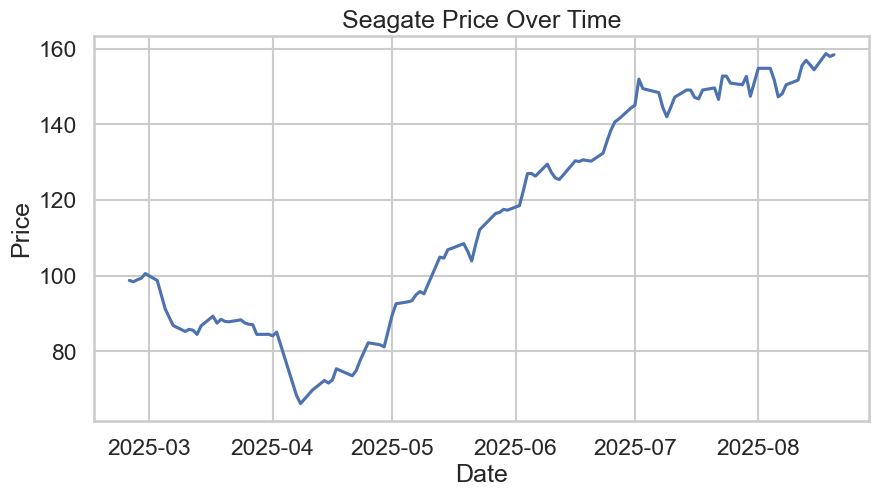

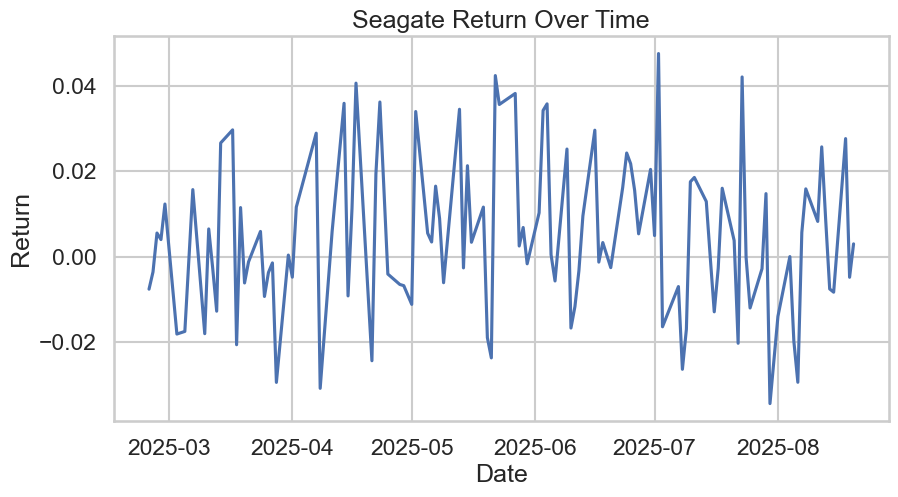

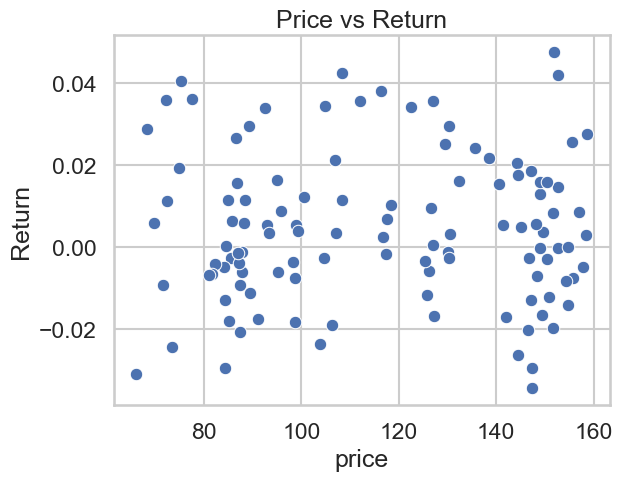

In [13]:
# ===  Relationships ===
# Time series of price
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["price"])
plt.title("Seagate Price Over Time")
plt.xlabel("Date"); plt.ylabel("Price")
plt.show()

# Time series of returns
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["Return"])
plt.title("Seagate Return Over Time")
plt.xlabel("Date"); plt.ylabel("Return")
plt.show()

# Price vs Return scatter
sns.scatterplot(data=df, x="price", y="Return")
plt.title("Price vs Return")
plt.show()

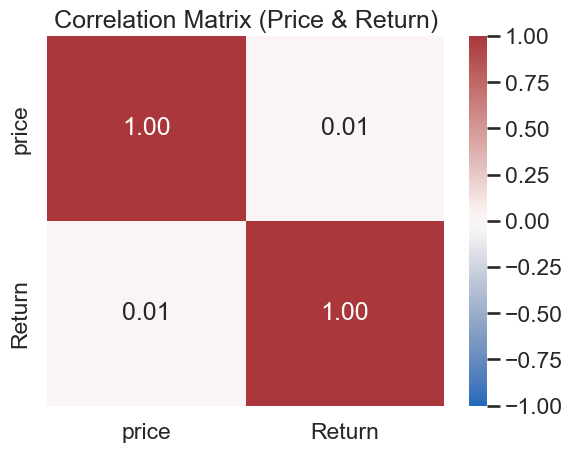

Correlation values:


,price,Return
price,1.000000,0.008568
Return,0.008568,1.000000


In [14]:
# ===  Correlation Matrix ===
corr = df[["price","Return"]].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Price & Return)")
plt.show()

print("Correlation values:")
display(corr)